In [65]:
using JSON,JLD,Knet,Images,ImageFiltering

In [102]:
global atype = KnetArray{Float32}

Knet.KnetArray{Float32,N} where N

In [76]:
include("visualize.jl")

invert (generic function with 1 method)

In [7]:
feats,data,i2w,w2i,i2a,a2i= initdataset();

image features from the validation set is loading...
elapsed time: 20.20645511 seconds
dictionaries and questions is loading...


(Float32[0.0 0.0173973 … 0.0 0.0; 0.0609797 0.505349 … 0.580147 0.567232; … ; 0.0 0.379722 … 0.0 0.0; 0.0 0.357598 … 0.0 0.0788363]

Float32[0.128146 0.0 … 0.00494482 0.224755; 0.0928117 0.099389 … 0.490559 0.525361; … ; 0.0982103 0.112886 … 0.0474334 0.17769; 0.211492 0.236791 … 0.215554 0.205068]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.80128 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0654491 0.0113243 … 0.0769687 0.0780268; 0.0902528 0.152665 … 0.122984 0.114653; … ; 0.118964 0.15501 … 0.118137 0.0323603; 0.192179 0.14962 … 0.0976368 0.0557665]

Float32[0.0627779 0.0 … 0.0 0.259556; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.166944 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.58382 … 0.0464926 0.0986127; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0324997 … 0.0 0.0; 0.0193345 0.552552 … 0.0527747 0.156073; … ; 0.0 0.219212 … 0.0 0.0; 0.0 0.267586 … 0.0 0.0]

Float32[0.109702 0.0 … 0.0 0.0819543; 0.151954 0.157953 … 0.0482795 0.12005; … ; 0.032626

elapsed time: 1.127786529 seconds


In [56]:
w,r = loadVQAModel();

pretrained model is loading...


In [96]:
inst       = rand(data)

4-element Array{Any,1}:
   "CLEVR_val_004954.png"                                   
   Any[87, 18, 23, 25, 37, 18, 4, 5, 45, 52, 18, 19, 20, 12]
  0                                                         
 12                                                         

In [97]:
id         = parse(Int,inst[1][end-9:end-4])+1
feat       = feats[:,:,:,id:id]
question   = Array{Int}(inst[2].+1)
answer     = inst[3]+1;
family     = inst[4];
results,prediction = forward(w,r,feat,question);

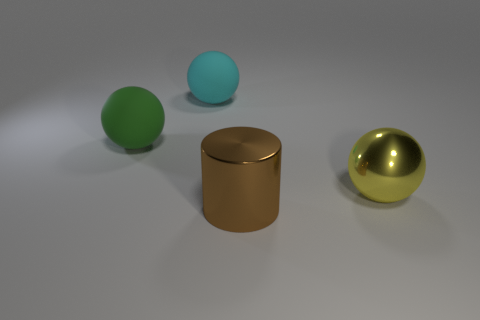

In [98]:
img = load("data/CLEVR_v1.0/images/val/$(inst[1])")

In [100]:
textq  = i2w[question];
println("Question:\n",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question:
Do the cyan object and the big green thing have the same shape ?
Answer: yes
Prediction: yes 


In [91]:
userinput = readline(STDIN)
words = split(userinput)
question = [ w2i[wr] for wr in words] .+ 1
results,prediction = forward(w,r,feat,question);
println("Prediction: $(i2a[prediction])")

stdin> what ?
Prediction: 4


step_1 most attn. wrds: String["?", "shape"]


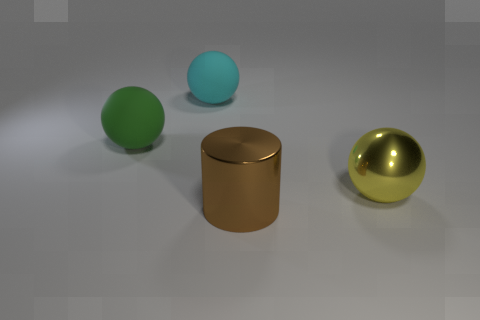

step_2 most attn. wrds: String["?", "shape"]


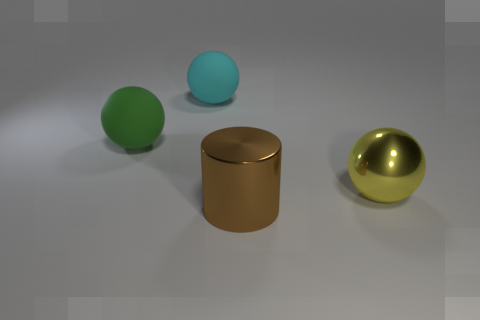

step_3 most attn. wrds: String["?", "shape"]


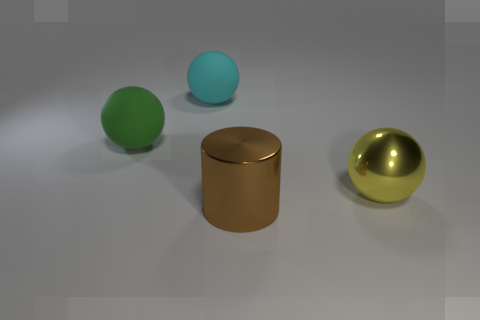

step_4 most attn. wrds: String["?", "shape"]


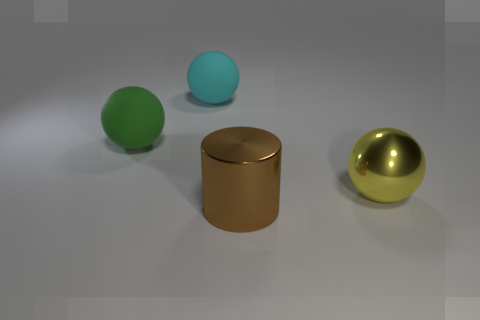

step_5 most attn. wrds: String["?", "shape"]


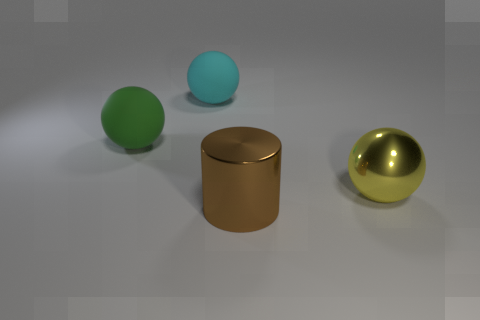

step_6 most attn. wrds: String["?", "shape"]


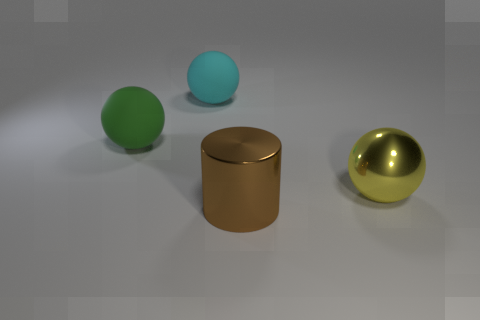

step_7 most attn. wrds: String["green", "big"]


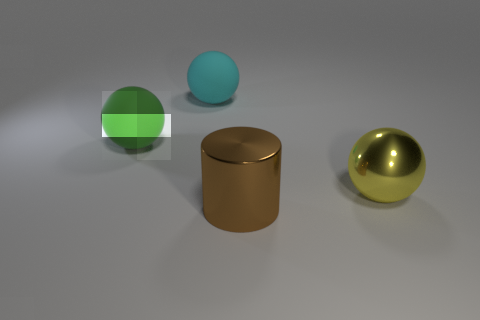

step_8 most attn. wrds: String["Do", "the"]


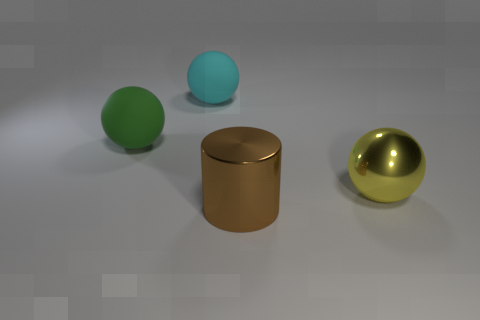

step_9 most attn. wrds: String["cyan", "same"]


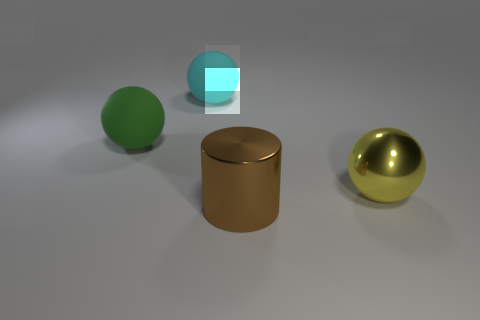

step_10 most attn. wrds: String["cyan", "object"]


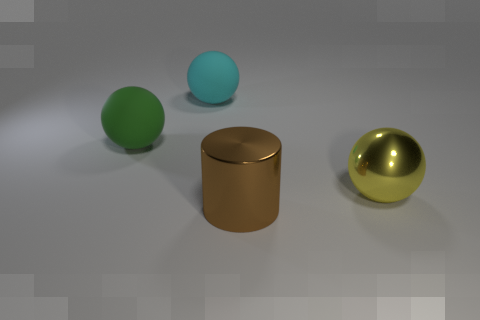

step_11 most attn. wrds: String["?", "Do"]


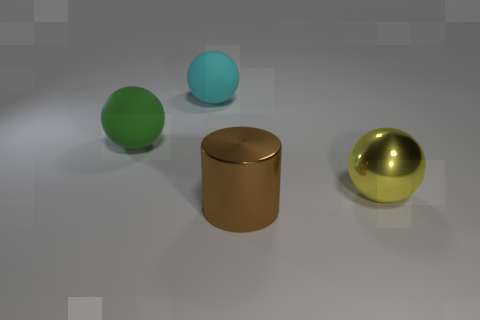

step_12 most attn. wrds: String["?", "Do"]


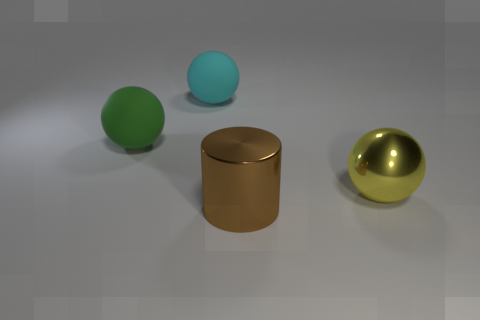

In [101]:
s_y,s_x = size(img)./14
for k=1:12
    α = results["cws_$(k)"][:]
    println("step_$(k) most attn. wrds: ",i2w[question[sortperm(α;rev=true)[1:2]]])
    flush(STDOUT)
    display([RGB{N0f8}(α[i],α[i],α[i]) for i=1:length(α)]);
    hsvimg = convert.(HSV,img);
    attn = results["KB_$(k)"]
    for i=1:14,j=1:14
        rngy          = floor(Int,(i-1)*s_y+1):floor(Int,min(i*s_y,320))
        rngx          = floor(Int,(j-1)*s_x+1):floor(Int,min(j*s_x,480))
        hsvimg[rngy,rngx]  = scalepixel.(hsvimg[rngy,rngx],attn[sub2ind((14,14),i,j)])
    end
    display(hsvimg)
end